In [61]:
using Plots
using DSP
using Statistics
using FFTW
using StatsBase

### 1.2 Checking the distribution of the random number generation to be according to a Gaussian distribution:

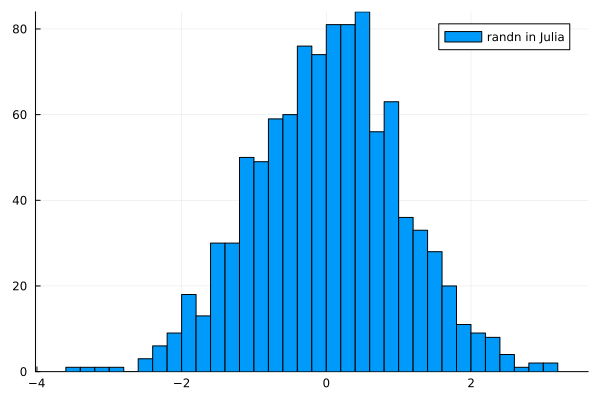

In [62]:
N = 1000
BINS = 50
onex_y = randn(N)
histogram(onex_y, bins=50, label="randn in Julia")

### 1.1 The white noise

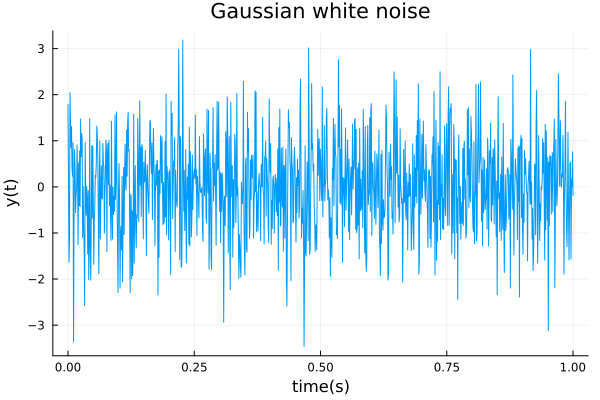

In [63]:
onex_x = range(0,1,N)
plot(onex_x,onex_y, xlabel="time(s)", ylabel="y(t)", legend=false, title="Gaussian white noise")

### 1.3 Generate the noise from 1.1 with an interval of 0.001 and doubling the output

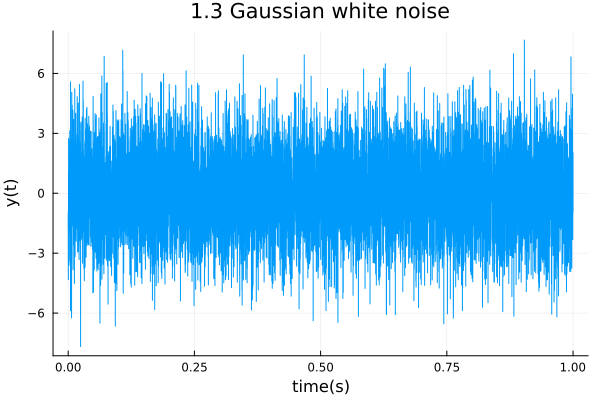

In [64]:
twox_x = 0:0.0001:1
twox_y = randn(length(twox_x)) * 2
plot(twox_x, twox_y, xlabel="time(s)", ylabel="y(t)", legend=false, title="1.3 Gaussian white noise")

### 1.4 Plot the histogram of the noise in 1.3

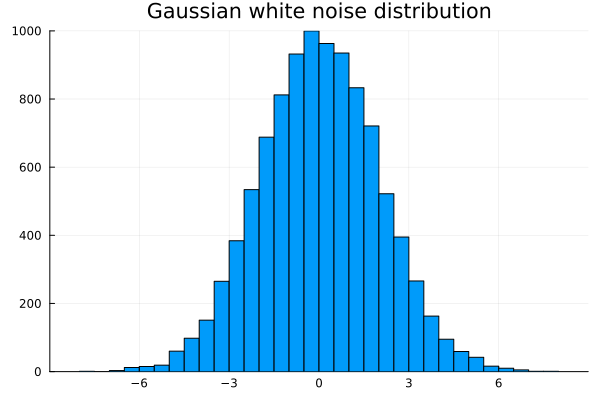

In [65]:
histogram(twox_y, bins=50, title="Gaussian white noise distribution", legend=false)

### 1.5 Design a second order digital filter with its own oscillation frequency of 1 Hz, pass the signal x1 through this filter and display the signal at the filter output.

In [66]:
# WIP

## 2. MAF Filtering

### 2.1 Generate a signal without noise

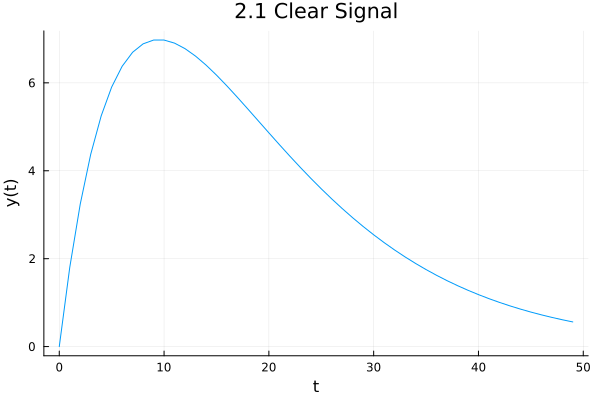

In [67]:
samples = 50
x = 0:1:samples-1
signal= @. 2*x*(0.9^x)
# stem
plot(x, signal, xlabel="t", ylabel="y(t)", legend=false, title="2.1 Clear Signal")

### 2.2 Generate a random noise

In [68]:
noise = randn(samples) .- 0.5
noise[1:5]

5-element Vector{Float64}:
  1.7680337749982877
 -0.06116582526097197
  1.5417563180343477
 -1.4002180715077122
 -1.8707311666450472

### 2.3 Plot both of these signals

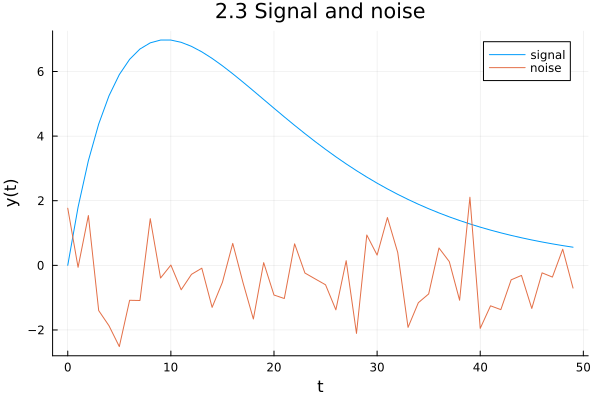

In [69]:
plot(x, signal, xlabel="t", ylabel="y(t)", label="signal", title="2.3 Signal and noise")
plot!(x, noise, xlabel="t", ylabel="y(t)", label="noise")

### 2.4 Add the noise to the signal and compare it to the original signal

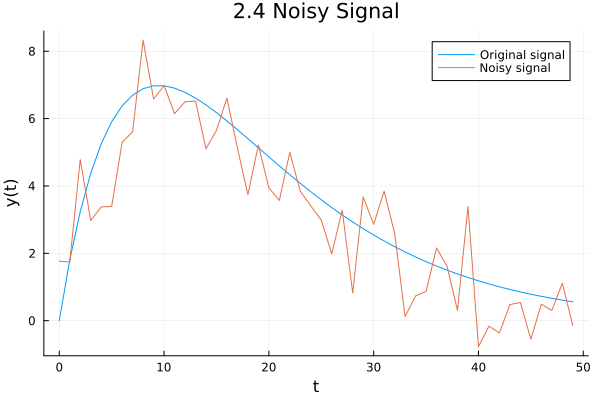

In [70]:
noisy_signal = signal + noise
plot(x, signal, xlabel="t", ylabel="y(t)", label="Original signal", title="2.4 Noisy Signal")
plot!(x, noisy_signal, xlabel="t", ylabel="y(t)", label="Noisy signal")


### 2.5 Apply a MAF filter with a window size of 3 to the noisy signal and compare it to the original signal and noisy signal

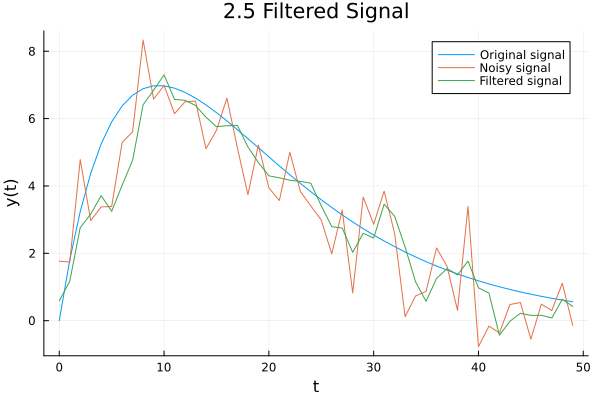

In [71]:
using DSP

window = 3
filtered_signal = filt(ones(window)/window, noisy_signal)
plot(x, signal, xlabel="t", ylabel="y(t)", label="Original signal", title="2.5 Filtered Signal")
plot!(x, noisy_signal, xlabel="t", ylabel="y(t)", label="Noisy signal")
plot!(x, filtered_signal, xlabel="t", ylabel="y(t)", label="Filtered signal")